# `Hopfield net`

Hopfield has recently won a nobel prize for his tremendous work on neural networks. In this file, we're going to implement an online neural net that is biologically feasible.
In addition, We're going to train a net to store memories of letters.


# Q1

## Part a

We're going to look at the net with the following elemtents:

$$
\mathbb{S}_1(0) = 1
\\
  
\mathbb{S}_2(0) = 1
\\
\mathbb{J}_{1,2} = 1
\\
\mathbb{J}_{2,1} = -1
\\
$$

Let's perform 1 iteration:

$$
\mathbb{S}_1(1):
\\
\text{ We'll calculate the sum:}
\\
\sum_{j = 1}^{2} \mathbb{J}_{1,j} \cdot \mathbb{S}_j(0) = \mathbb{J}_{1,1} \cdot \mathbb{S}_1(0) + \mathbb{J}_{1,2} \cdot \mathbb{S}_2(0) = 0 \cdot 1 + 1 \cdot 1 >0
\\
\textrm{Thus:} \quad \mathbb{S}_1(1) = \mathbb{S}_1(0) = 1
\\
\left[ \mathbb{S}_1(1) = 1, \quad \mathbb{S}_2(1) = 1 \right]
\\
\mathbb{S}_1(2):
\\
\sum_{j = 1}^{2} \mathbb{J}_{2,j} \cdot \mathbb{S}_j(1) = \mathbb{J}_{2,1} \cdot \mathbb{S}_1(1) + \mathbb{J}_{2,2} \cdot \mathbb{S}_2(1) = -1 \cdot 1 + 0 \cdot 1 < 0 
\\
\textrm{Thus:} \quad \mathbb{S}_2(2) = -\mathbb{S}_2(1) = -1
\\
\left[ \mathbb{S}_1(2) = 1, \quad \mathbb{S}_2(2) = -1 \right]
$$
Iteration 2:

$$
\mathbb{S}_1(2):
\\
\sum_{j = 1}^{2} \mathbb{J}_{1,j} \cdot \mathbb{S}_j(1) = \mathbb{J}_{1,1} \cdot \mathbb{S}_1(1) + \mathbb{J}_{1,2} \cdot \mathbb{S}_2(1) = 0 \cdot 1 + 1 \cdot (-1) < 0
\\
\textrm{Thus:} \quad \mathbb{S}_1(2) = -\mathbb{S}_1(1) = -1
$$




In each iteration the sign of states is changing thus the net is not stable.

# Q2

## Part a

We're going to look at the net with the following elements:

$$
p^{(1)} = (-1,-1,1,1)^T
\\
p^{(2)} = (1,-1,-1,1)^T
\\
p^{(3)} = (-1,1,-1,1)^T
$$
First, let's store them in a memory matrix according to the Hebb rule:

$$
\mathbb{J}_{ij} = 
\begin{cases} 
\frac{1}{N}\sum_{i} \sum_{j} p^{(k)}_i p^{(k)}_j & \text{if } i \neq j \\
0 & \text{else} 
\end{cases}
$$
Each cell in J we'll denote as $\mathbb{J}_{ij}$.


Let's write matrix J for $p^{(k)} \in \mathbb{R}^{4}$:

$$
P = \begin{bmatrix} 0 & \sum_{k = 1}^{3} p_1^{(k)}p_2^{(k)} & \sum_{k = 1}^{3}p_1^{(k)}p_3^{(k)} & \sum_{k = 1}^{3} p_1^{(k)}p_4^{(k)} \\ \sum_{k = 1}^{3} p_2^{(k)}p_1^{(k)} & 0 & \sum_{k = 1}^{3} p_2^{(k)}p_3^{(k)} & \sum_{k = 1}^{3} p_2^{(k)}p_4^{(k)} \\ \sum_{k = 1}^{3} p_3^{(k)}p_1^{(k)} & \sum_{k = 1}^{3} p_3^{(k)}p_2^{(k)} & 0 & \sum_{k = 1}^{3} p_3^{(k)}p_4^{(k)} \\ \sum_{k = 1}^{3} p_4^{(k)}p_1^{(k)} & \sum_{k = 1}^{3} p_4^{(k)}p_2^{(k)} & \sum_{k = 1}^{3} p_4^{(k)}p_3^{(k)} & 0 \end{bmatrix} = \begin{bmatrix} 0 & -1 & -1 & -1 \\ -1 & 0 & -1 & -1 \\ -1 & -1 & 0 & -1 \\ -1 & -1 & -1 & 0 \end{bmatrix}
\\
\mathbb{J} = \frac{1}{4}P = \begin{bmatrix} 0 & -\frac{1}{4} & -\frac{1}{4} & -\frac{1}{4} \\ -\frac{1}{4} & 0 & -\frac{1}{4} & -\frac{1}{4} \\ -\frac{1}{4} & -\frac{1}{4} & 0 & -\frac{1}{4} \\ -\frac{1}{4} & -\frac{1}{4} & -\frac{1}{4} & 0 \end{bmatrix}
$$

Because the transitions matrix is symmetric, we can say that the net is stable and converges to a finite stage, from theorem.





We know that the for step t+1 the net will be:

$$
\mathbb{S}_i(t+1) = 
\begin{cases}
sign(\sum_{i = 1}^{N} p_i^{(1)} m^{(1)}) & \text{if } |m^{(1)}| > |m^{(2)}| \text{ and } |m^{(1)}| > |m^{(3)}| \\
sign(\sum_{i = 1}^{N} p_i^{(2)} m^{(2)}) & \text{if } |m^{(2)}| > |m^{(1)}| \text{ and } |m^{(2)}| > |m^{(3)}| \\
sign(\sum_{i = 1}^{N} p_i^{(3)} m^{(3)}) & \text{if } |m^{(3)}| > |m^{(1)}| \text{ and } |m^{(3)}| > |m^{(2)}| \\
\end{cases}
$$


# Part b

We can't find new memories that are not inverse for the selected memories that will maintain stable net for every initial $\mathbb{S}_i(t)$ chosen.

Let $\mathbb{S}_m(t) = sign(p_i^{(1)} + p_i^{(2)} + p_i^{(3)})$.

We'll compute the energy for a memory in the net, an inverse memory and a new memory of state $\mathbb{S}_m(t)$:

$$
\text{ Let S be the state of the net:} \quad \mathbb{S}(0) = p_i^{(1)}:
\\
\mathbb{S}(0) = \left[ \mathbb{S}_1(0) = -1, \quad \mathbb{S}_2(0) = -1, \quad \mathbb{S}_3(0) = 1, \quad \mathbb{S}_4(0) = 1 \right]
\\
E(0) = -0.5 \cdot \sum_{i = 1}^{4} \sum_{j = 1}^{4} \mathbb{J}_{ij} \mathbb{S}_i(t) \mathbb{S}_j(t) = -\sum_{i = 1}^{4} \sum_{j = 1}^{4} \mathbb{J}_{ij} p_i^{(1)} p_j^{(1)} = -(0 \cdot 1 - \frac{1}{4} \cdot (-1) \cdot (-1) - \frac{1}{4} \cdot (-1) \cdot 1 - \frac{1}{4} \cdot (-1) \cdot 1 -2 \cdot \frac{1}{4} \cdot (-1) - \frac{1}{4})  = -0.5
\\
\mathbb{S}(1):
\\
\sum_{j = 1}^{4} \mathbb{J}_{1,j} \cdot \mathbb{S}_j(0) = \mathbb{J}_{1,1} \cdot \mathbb{S}_1(0) + \mathbb{J}_{1,2} \cdot \mathbb{S}_2(0) + \mathbb{J}_{1,3} \cdot \mathbb{S}_3(0) \mathbb{J}_{1,4} \cdot \mathbb{S}_4(0) = 0 \cdot (-1) - \frac{1}{4} \cdot (-1) - \frac{1}{4} \cdot 1 - \frac{1}{4} \cdot 1 = -0.25
\\
\text{Thus:} \quad \mathbb{S}_1(1) = \mathbb{S}_1(0) = -0.5
\\
\mathbb{S}(1) = \left[ \mathbb{S}_1(1) = -1, \quad \mathbb{S}_2(1) = -1, \quad \mathbb{S}_3(1) = 1, \quad \mathbb{S}_4(1) = 1 \right]
\\
E(1) = E(0) = -0.5
\\
\mathbb{S}(2):
\\
\sum_{j = 1}^{4} \mathbb{J}_{2,j} \cdot \mathbb{S}_j(1) = \mathbb{J}_{2,1} \cdot \mathbb{S}_1(1) + \mathbb{J}_{2,2} \cdot \mathbb{S}_2(1) + \mathbb{J}_{2,3} \cdot \mathbb{S}_3(1) + \mathbb{J}_{2,4} \cdot \mathbb{S}_4(1) = -0.25 \cdot (-1) - 0 \cdot (-1) - \frac{1}{4} \cdot 1 - \frac{1}{4} \cdot 1 = -0.25
\\
\text{Thus:} \quad \mathbb{S}_2(2) = \mathbb{S}_2(1) = -0.5
\\
E(2) = E(1) = -0.5
\\
\mathbb{S}(3):
\\
\mathbb{S}(2) = \left[ \mathbb{S}_1(2) = -1, \quad \mathbb{S}_2(2) = -1, \quad \mathbb{S}_3(2) = 1, \quad \mathbb{S}_4(2) = 1 \right]
\\
\sum_{j = 1}^{4} \mathbb{j}_{3,j} \cdot \mathbb{S}_j(2) = \mathbb{J}_{3,1} \cdot \mathbb{S}_1(2) + \mathbb{J}_{3,2} \cdot \mathbb{S}_2(2) + \mathbb{J}_{3,3} \cdot \mathbb{S}_3(2) + \mathbb{J}_{3,4} \cdot \mathbb{S}_4(2) = -0.25 \cdot (-1) - \frac{1}{4} \cdot (-1) - 0 \cdot 1 - \frac{1}{4} \cdot 1 = 0.25
\\
\text{Thus:} \quad \mathbb{S}_3(3) = \mathbb{S}_3(2) = 1
\\
\text{In conclusion, the net is stable. and we get same energy for each step.}
$$

Moreover, if we look at inverse for this memory we'll get similar results - the net is stable, the energy is the same for each step, with equal energy, E = -0.5.

For the new state $\mathbb{S}_m(t)$:

$$
\text{ Let S be the state of the net:} \quad S = \mathbb{S}_m(0):
\\
\mathbb{S}(0) = \left[ \mathbb{S}_1(0) = -1, \quad \mathbb{S}_2(0) = -1, \quad \mathbb{S}_3(0) = -1, \quad \mathbb{S}_4(0) = 3 \right]
\\
E(0) = -\sum_{i = 1}^{4} \sum_{j = 1}^{4} \mathbb{J}_{ij} \mathbb{S}_i(t) \mathbb{S}_j(t) = -\sum_{i = 1}^{4} \sum_{j = 1}^{4} \mathbb{J}_{ij} p_i^{(1)} p_j^{(1)} = -(0 \cdot 1 - \frac{1}{4} \cdot (-1) \cdot (-1) - \frac{1}{4} \cdot (-1) \cdot (-1) - \frac{1}{4} \cdot (-1) \cdot 3 - 0.25 + 3 \cdot 0.25) \cdot 2 = -0.5
\\

$$

## Part c

$$
\text{ Let S be} \quad \mathbb{S}(0) = \left[ \mathbb{S}_1(0) = -1, \quad \mathbb{S}_2(0) = -1, \quad \mathbb{S}_3(0) = -1, \quad \mathbb{S}_4(0) = 1 \right]
\\
E(0) = -0.5 \cdot \sum_{i = 1}^{4} \sum_{j = 1}^{4} \mathbb{J}_{ij} \mathbb{S}_i(t) \mathbb{S}_j(t) = -\sum_{i = 1}^{4} \sum_{j = 1}^{4} \mathbb{J}_{ij} p_i^{(1)} p_j^{(1)} = -(0 \cdot 1 - \frac{1}{4} \cdot (-1) \cdot (-1) - \frac{1}{4} \cdot 1 - \frac{1}{4} \cdot (-1) \cdot 1 - 2 \cdot \frac{1}{4} \cdot (-1) - \frac{1}{4}) = 0
\\
\mathbb{S}(1):
\\
\sum_{j = 1}^{4} \mathbb{J}_{1,j} \cdot \mathbb{S}_j(0) = \mathbb{J}_{1,1} \cdot \mathbb{S}_1(0) + \mathbb{J}_{1,2} \cdot \mathbb{S}_2(0) + \mathbb{J}_{1,3} \cdot \mathbb{S}_3(0) \mathbb{J}_{1,4} \cdot \mathbb{S}_4(0) = 0 \cdot (-1) + \frac{1}{4} + \frac{1}{4} \cdot 1 - \frac{1}{4}  = 0.25
\\
\text{Thus:} \quad \mathbb{S}_1(1) = -\mathbb{S}_1(0) = 1
\\
\mathbb{S}(1) = \left[ \mathbb{S}_1(1) = 1, \quad \mathbb{S}_2(1) = -1, \quad \mathbb{S}_3(1) = -1, \quad \mathbb{S}_4(1) = 1 \right]
\\
E(1) = -0.5 \cdot \sum_{i = 1}^{4} \sum_{j = 1}^{4} \mathbb{J}_{ij} \mathbb{S}_i(t) \mathbb{S}_j(t) = -\sum_{i = 1}^{4} \sum_{j = 1}^{4} \mathbb{J}_{ij} p_i^{(1)} p_j^{(1)} = (0 \cdot 1 - \frac{1}{4} \cdot 1 \cdot (-1) - \frac{1}{4} \cdot (-1) - \frac{1}{4} \cdot 1 \cdot 1 - 2 \cdot \frac{1}{4} \cdot (-1) - \frac{1}{4}) = -0.5
\\
\mathbb{S}(2):
\\
\sum_{j = 1}^{4} \mathbb{J}_{2,j} \cdot \mathbb{S}_j(1) = \mathbb{J}_{2,1} \cdot \mathbb{S}_1(1) + \mathbb{J}_{2,2} \cdot \mathbb{S}_2(1) + \mathbb{J}_{2,3} \cdot \mathbb{S}_3(1) + \mathbb{J}_{2,4} \cdot \mathbb{S}_4(1) = -0.25 - 0 \cdot (-1) - \frac{1}{4} \cdot (-1) - \frac{1}{4} \cdot 1 = -0.25
\\
\text{Thus:} \quad \mathbb{S}_2(2) = \mathbb{S}_2(1) = -1
\\
E(2) = E(1) = -0.5
\\
\mathbb{S}(3):
\\
\mathbb{S}(2) = \left[ \mathbb{S}_1(2) = 1, \quad \mathbb{S}_2(2) = -1, \quad \mathbb{S}_3(2) = -1, \quad \mathbb{S}_4(2) = 1 \right]
\\
\sum_{j = 1}^{4} \mathbb{j}_{3,j} \cdot \mathbb{S}_j(2) = \mathbb{J}_{3,1} \cdot \mathbb{S}_1(2) + \mathbb{J}_{3,2} \cdot \mathbb{S}_2(2) + \mathbb{J}_{3,3} \cdot \mathbb{S}_3(2) + \mathbb{J}_{3,4} \cdot \mathbb{S}_4(2) = -0.25 - \frac{1}{4} \cdot (-1) - 0 \cdot 1 - \frac{1}{4} \cdot 1 = -0.25
\\
\text{Thus:} \quad \mathbb{S}_3(3) = \mathbb{S}_3(2) = -1
\\
E(3) = E(2) = -0.5
\\
\mathbb{S}(4):
\\
\mathbb{S}(3) = \left[ \mathbb{S}_1(2) = 1, \quad \mathbb{S}_2(2) = -1, \quad \mathbb{S}_3(2) = -1, \quad \mathbb{S}_4(2) = 1 \right]
\\
\sum_{j = 1}^{4} \mathbb{J}_{4,j} \cdot \mathbb{S}_j(3) = \mathbb{J}_{4,1} \cdot \mathbb{S}_1(3) + \mathbb{J}_{4,2} \cdot \mathbb{S}_2(3) + \mathbb{J}_{4,3} \cdot \mathbb{S}_3(3) + \mathbb{J}_{4,4} \cdot \mathbb{S}_4(3) = -0.25 - \frac{1}{4} \cdot (-1) - \frac{1}{4} \cdot (-1) - 0 \cdot 1 = 0.25
\\
\text{Thus:} \quad \mathbb{S}_4(4) = \mathbb{S}_4(3) = 1
$$

## Part d:

For synchronous update, we'll compute the energy for each memory:

$$
\text{ Let S be} \quad \mathbb{S}(0) = \left[ \mathbb{S}_1(0) = -1, \quad \mathbb{S}_2(0) = -1, \quad \mathbb{S}_3(0) = -1, \quad \mathbb{S}_4(0) = 1 \right]
\\
E(0) = -0.5 \cdot \sum_{i = 1}^{4} \sum_{j = 1}^{4} \mathbb{J}_{ij} \mathbb{S}_i(t) \mathbb{S}_j(t) = -\sum_{i = 1}^{4} \sum_{j = 1}^{4} \mathbb{J}_{ij} p_i^{(1)} p_j^{(1)} = -(0 \cdot 1 - \frac{1}{4} \cdot (-1) \cdot (-1) - \frac{1}{4} \cdot 1 - \frac{1}{4} \cdot (-1) \cdot 1 - 2 \cdot \frac{1}{4} \cdot (-1) - \frac{1}{4}) = 0
\\
\mathbb{S}(1):
\\
\sum_{j = 1}^{4} \mathbb{J}_{1,j} \cdot \mathbb{S}_j(0) = \mathbb{J}_{1,1} \cdot \mathbb{S}_1(0) + \mathbb{J}_{1,2} \cdot \mathbb{S}_2(0) + \mathbb{J}_{1,3} \cdot \mathbb{S}_3(0) \mathbb{J}_{1,4} \cdot \mathbb{S}_4(0) = 0 \cdot (-1) - \frac{1}{4} \cdot (-1) - \frac{1}{4} \cdot (-1) - \frac{1}{4} \cdot 1 = 0.25
\\
\sum_{j = 1}^{4} \mathbb{J}_{2,j} \cdot \mathbb{S}_j(0) = \mathbb{J}_{2,1} \cdot \mathbb{S}_1(0) + \mathbb{J}_{2,2} \cdot \mathbb{S}_2(0) + \mathbb{J}_{2,3} \cdot \mathbb{S}_3(0) \mathbb{J}_{2,4} \cdot \mathbb{S}_4(0) = -0.25 \cdot (-1) - 0 \cdot (-1) - \frac{1}{4} \cdot (-1) - \frac{1}{4} \cdot 1 = 0.25
\\
\sum_{j = 1}^{4} \mathbb{J}_{3,j} \cdot \mathbb{S}_j(0) = \mathbb{J}_{3,1} \cdot \mathbb{S}_1(0) + \mathbb{J}_{3,2} \cdot \mathbb{S}_2(0) + \mathbb{J}_{3,3} \cdot \mathbb{S}_3(0) \mathbb{J}_{3,4} \cdot \mathbb{S}_4(0) = -0.25 \cdot (-1) - \frac{1}{4} \cdot (-1) - 0 \cdot (-1) - \frac{1}{4} \cdot 1 = 0.25
\\
\sum_{j = 1}^{4} \mathbb{J}_{4,j} \cdot \mathbb{S}_j(0) = \mathbb{J}_{4,1} \cdot \mathbb{S}_1(0) + \mathbb{J}_{4,2} \cdot \mathbb{S}_2(0) + \mathbb{J}_{4,3} \cdot \mathbb{S}_3(0) \mathbb{J}_{4,4} \cdot \mathbb{S}_4(0) = -0.25 \cdot (-1) - \frac{1}{4} \cdot (-1) - \frac{1}{4} \cdot (-1) - 0 \cdot 1 = 0.75
\\
\text{Thus:} \quad \mathbb{S}_1(1) = -\mathbb{S}_1(0) = 1, \quad \mathbb{S}_2(1) = -\mathbb{S}_2(0) = 1, \quad \mathbb{S}_3(1) = -\mathbb{S}_3(0) = 1, \quad \mathbb{S}_4(1) = \mathbb{S}_4(0) = 1
\\
\mathbb{S}(1) = \left[ \mathbb{S}_1(1) = 1, \quad \mathbb{S}_2(1) = 1, \quad \mathbb{S}_3(1) = 1, \quad \mathbb{S}_4(1) = 1 \right]
\\
E[1] = -0.5 \cdot \sum_{i = 1}^{4} \sum_{j = 1}^{4} \mathbb{J}_{ij} \mathbb{S}_i(t) \mathbb{S}_j(t) = -\sum_{i = 1}^{4} \sum_{j = 1}^{4} \mathbb{J}_{ij} p_i^{(1)} p_j^{(1)} = -(0 \cdot 1 - \frac{1}{4} \cdot 1 \cdot 1 - \frac{1}{4} \cdot 1 \cdot 1 - \frac{1}{4} \cdot 1 \cdot 1 - 2 \cdot \frac{1}{4} \cdot 1 - \frac{1}{4}) = 1.5
$$

# Q3

## Part a

Let's switch to a broader view with a larger net. 

We'll have 3 memories in a net with infinite size. We'll denote the state of the net as $\mathbb{S}_i(t)$ and $m^{(\mu)}$ as the correlation of memory $\mu$ with the state of the net.

First we'll write the values of the synapses:

$$
\mathbb{J}_{ij} = \frac{1}{N}\sum_{k = 1}^{3} p_i^{(k)} p_j^{(k)} = \frac{1}{N} \left( p_i^{(1)} p_j^{(1)} + p_i^{(2)} p_j^{(2)} + p_i^{(3)} p_j^{(3)} \right)
$$

We'll compute the energy:

$$
E(p^{(1)}) = -\frac{1}{2} \sum_{i = 1}^{N} \sum_{j = 1}^{N} \mathbb{J}_{ij} p_i^{(1)} p_j^{(1)} = -\frac{1}{2} \sum_{i = 1}^{N} \sum_{j = 1}^{N} \frac{1}{N} \left( p_i^{(1)} p_j^{(1)} + p_i^{(2)} p_j^{(2)} + p_i^{(3)} p_j^{(3)} \right) p_i^{(1)} p_j^{(1)} = \ast
$$

Because different memories are orthogonal, we'll get:

$$
\ast = -0.5 \sum_{i = 1}^{N} \sum_{j = 1}^{N} \frac{1}{N} p_i^{(1)} p_j^{(1)} p_i^{(1)} p_j^{(1)} = -\frac{1}{2N} \cdot N^2 = -\frac{N}{2}
$$
## Part b

Let $S = sgn(P_1^{(1)} + P_1^{(2)} + P_1^{(3)})$. We'll compute the energy for the new memory:

$$
E(S) = -\frac{1}{2} \sum_{i = 1}^{N} \sum_{j = 1}^{N} \mathbb{J}_{ij} S_i S_j = -\frac{1}{2} \sum_{i = 1}^{N} \sum_{j = 1}^{N} \sum_{k = 1}^{3} \frac{1}{N} p_i^{(k)} p_j^{(k)} sgn(p_i^{(1)} + p_i^{(2)} + p_i^{(3)}) sgn(p_j^{(1)} + p_j^{(2)} + p_j^{(3)}) = -\frac{1}{2N} \sum_{k = 1}^{3} \sum_{i = 1}^{N} \sum_{j = 1}^{N} p_i^{(k)} p_j^{(k)} sgn(p_i^{(1)} + p_i^{(2)} + p_i^{(3)}) sgn(p_j^{(1)} + p_j^{(2)} + p_j^{(3)}) = 
\\
-\frac{1}{2N} \sum_{k = 1}^{3} \sum_{i = 1}^{N}  p_i^{(k)} sgn(p_i^{(1)} + p_i^{(2)} + p_i^{(3)}) \sum_{j = 1}^{N} p_j^{(k)} sgn(p_j^{(1)} + p_j^{(2)} + p_j^{(3)}) = -\frac{1}{2N} \sum_{k = 1}^{3} \sum_{i = 1}^{N}  p_i^{(k)} sgn(p_i^{(1)} + p_i^{(2)} + p_i^{(3)}) \sum_{j = 1}^{N} p_j^{(k)} sgn(p_j^{(1)} + p_j^{(2)} + p_j^{(3)}) = 
\\
\text{ We know that} \quad \sum_{j = 1}^{N} p_j^{(k)} s_j = \sum_{i = 1}^{N}  p_i^{(k)} s_i = N * M^{(k)} \quad \text{where} \quad M^{(k)} = \frac{1}{N} \sum_{i = 1}^{N} p_i^{(k)} s_i, M^{(k)} = 0.5
\\
\text{Thus, we got } \quad E(S) = -\frac{1}{2N} \sum_{k = 1}^{3} N^2 M^{(k)} M^{(k)} = -\frac{3N}{8}
$$

## Part c

Our original N was 4 and we had 4 memories, with energy -4/8. Thus, this calculation is consistent with the previous one. 






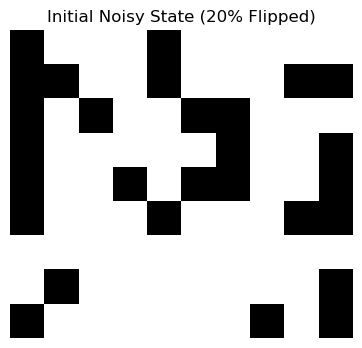

Is initial noisy state stable? False


Updating:   0%|          | 1/10000 [00:00<00:09, 1001.98it/s]

Converged in 2 iterations


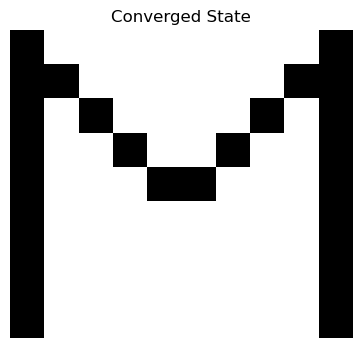

The network successfully converged to the letter 'M'.
Is 'M' a stable pattern? True


In [34]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import seaborn as sns

# 1. Define the letter 'M' on a 9x10 grid
# 1 represents active pixel, -1 represents inactive pixel
M = np.array([
    [1, -1, -1, -1, -1, -1, -1, -1, -1, 1],
    [1, 1, -1, -1, -1, -1, -1, -1, 1, 1],
    [1, -1, 1, -1, -1, -1, -1, 1, -1, 1],
    [1, -1, -1, 1, -1, -1, 1, -1, -1, 1],
    [1, -1, -1, -1, 1, 1, -1, -1, -1, 1],
    [1, -1, -1, -1, -1, -1, -1, -1, -1, 1],
    [1, -1, -1, -1, -1, -1, -1, -1, -1, 1],
    [1, -1, -1, -1, -1, -1, -1, -1, -1, 1],
    [1, -1, -1, -1, -1, -1, -1, -1, -1, 1]
])

# Flatten the grid to create a binary vector of length 90
p = M.flatten()

# 2. Initialize weight matrix using Hebbian rule
W = np.outer(p, p)
np.fill_diagonal(W, 0)  # No self-connections

# 3. Function to visualize a 9x10 pattern
def visualize_pattern(pattern, title=''):
    plt.figure(figsize=(5, 4))
    plt.imshow(pattern.reshape(9, 10), cmap='binary')
    plt.title(title)
    plt.axis('off')
    plt.show()

# 4. Function to check if a state is stable
def is_stable(state, W):
    for i in range(len(state)):
        net_input = np.dot(W[i], state)
        s = 1 if net_input >= 0 else -1
        if s != state[i]:
            return False
    return True

# 5. Asynchronous update function
def asynchronous_update(state, W, max_iterations=10000):
    N = len(state)
    for iteration in tqdm(range(max_iterations), desc="Updating"):
        prev_state = state.copy()
        num_changed = 0
        # Randomly shuffle neuron indices
        neuron_indices = np.arange(N)
        np.random.shuffle(neuron_indices)
        for i in neuron_indices:
            net_input = np.dot(W[i], state)
            s_new = 1 if net_input >= 0 else -1
            if s_new != state[i]:
                num_changed += 1
            state[i] = s_new
        if num_changed == 0:
            print(f"Converged in {iteration+1} iterations")
            break  # Convergence achieved
    return state


# 6. Initialize a state with 20% bits different from 'M'
initial_state = p.copy()
num_flips = int(len(p) * 0.2)  # Calculate 20% of the total bits
flip_indices = np.random.choice(len(p), size=num_flips, replace=False)  # Randomly choose indices to flip
initial_state[flip_indices] *= -1  # Flip the selected bits

# 7. Visualize initial noisy state
visualize_pattern(initial_state, title='Initial Noisy State (20% Flipped)')

# 8. Check if initial state is stable
print("Is initial noisy state stable?", is_stable(initial_state, W))

# 9. Run the asynchronous update
final_state = asynchronous_update(initial_state, W)

# 10. Visualize final state
visualize_pattern(final_state, title='Converged State')

# 11. Check if the network converged to 'M'
if np.array_equal(final_state, p):
    print("The network successfully converged to the letter 'M'.")
else:
    print("The network did not converge to 'M'.")

# 12. Verify if the stored pattern is stable
print("Is 'M' a stable pattern?", is_stable(p, W))



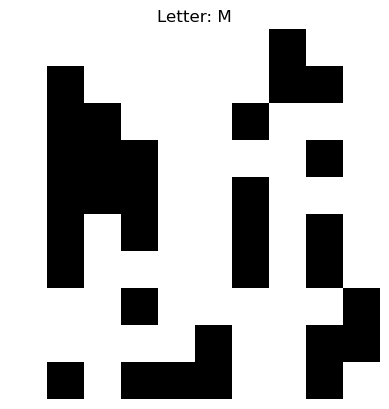

Is initial noisy state stable? False
Converged in 2 iterations


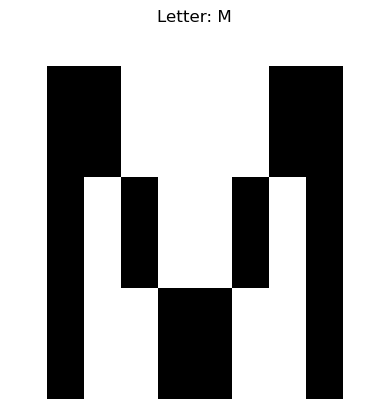

The network successfully converged to the letter 'M'.
Is 'M' a stable pattern? True


In [79]:
from PIL import Image, ImageDraw, ImageFont
import numpy as np
import matplotlib.pyplot as plt

# Function to generate a matrix for a given letter
def generate_letter_matrix(letter, width=10, height=10, font_path="arial.ttf"):
    # Create a blank image with white background
    image = Image.new('L', (width, height), color=255)
    draw = ImageDraw.Draw(image)
    
    # Load the font
    try:
        font = ImageFont.truetype(font_path, size=12)
    except IOError:
        font = ImageFont.load_default()
    
    # Calculate text bounding box and position
    text_bbox = draw.textbbox((0, 0), letter, font=font)
    text_width = text_bbox[2] - text_bbox[0]
    text_height = text_bbox[3] - text_bbox[1]
    x = (width - text_width) // 2
    y = (height - text_height) // 2 - 1  # Adjust as needed
    
    # Draw the letter onto the image
    draw.text((x, y), letter, fill=0, font=font)
    
    # Convert image to numpy array
    array = np.array(image)
    
    # Binarize the image: pixels with value < 128 are set to 1 (black), others to -1 (white)
    binary_array = np.where(array < 128, -1, 1)
    
    return binary_array

# 2. Generate matrices for all letters
letters = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'
letter_matrices = {}

for letter in letters:
    matrix = generate_letter_matrix(letter)
    letter_matrices[letter] = matrix.flatten()

# 3. Visualize one of the letters
def visualize_letter_matrix(matrix, letter):
    plt.imshow(matrix.reshape(10, 10), cmap='gray')
    plt.title(f'Letter: {letter}')
    plt.axis('off')
    plt.show()

# Example visualization

def asynchronous_update(state, W, max_iterations=10000):
    N = len(state)
    patterns_list = []
    for iteration in range(max_iterations):
        prev_state = state.copy()
        num_changed = 0
        # Randomly shuffle neuron indices
        neuron_indices = np.arange(N)
        np.random.shuffle(neuron_indices)
        for i in neuron_indices:
            net_input = np.dot(W[i], state)
            s_new = 1 if net_input >= 0 else -1
            if s_new != state[i]:
                num_changed += 1
            state[i] = s_new
            patterns_list.append(state.copy())
        if num_changed == 0:
            print(f"Converged in {iteration+1} iterations")
            break  # Convergence achieved
    return state,patterns_list


# 6. Initialize a state with 20% bits different from 'M'
p1 = letter_matrices['M']
initial_state = p1.copy()
W = np.outer(initial_state, initial_state)
np.fill_diagonal(W, 0)
num_flips = int(len(p) * 0.2)  # Calculate 20% of the total bits
flip_indices = np.random.choice(len(p), size=num_flips, replace=False)  # Randomly choose indices to flip
initial_state[flip_indices] *= -1  # Flip the selected bits

# 7. Visualize initial noisy state
visualize_letter_matrix(initial_state,'M')

# 8. Check if initial state is stable
print("Is initial noisy state stable?", is_stable(initial_state, W))

# 9. Run the asynchronous update
final_state,patterns = asynchronous_update(initial_state, W)

# 10. Visualize final state
visualize_letter_matrix(final_state, 'M')

# 11. Check if the network converged to 'M'
if np.array_equal(final_state, p):
    print("The network successfully converged to the letter 'M'.")
else:
    print("The network did not converge to 'M'.")

# 12. Verify if the stored pattern is stable
print("Is 'M' a stable pattern?", is_stable(p, W))


# 4. Now you can use 'letter_matrices' for your Hopfield network

# Part c

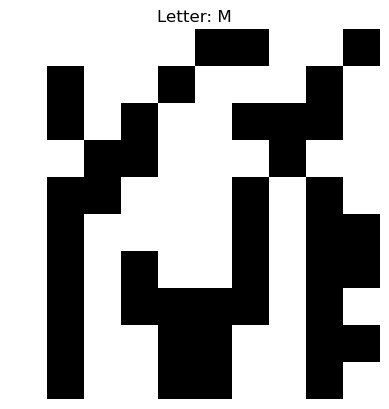

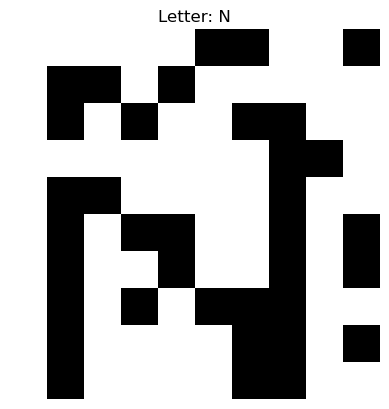

Is initial noisy state stable? False
Is initial noisy state stable? False
Converged in 2 iterations
Converged in 2 iterations


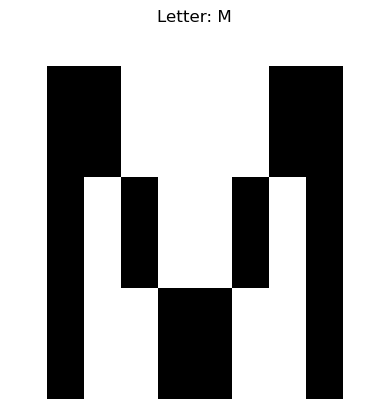

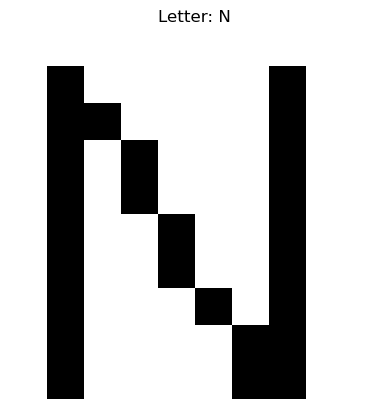

The network did not converge to 'M'.
The network successfully converged to the letter 'N'.
Is 'M' a stable pattern? True
Is 'N' a stable pattern? True


In [104]:
# Collect the patterns for 'M' and 'N'
patterns = [letter_matrices['M'].flatten(), letter_matrices['N'].flatten()]

# Initialize the weight matrix
N = len(patterns[0])
W = np.zeros((N, N))

# Hebbian learning rule for multiple patterns
for p in patterns:
    W += np.outer(p, p)

# Ensure no self-connections
np.fill_diagonal(W, 0)
initial_state1 = patterns[0]
initial_state2 = patterns[1]
num_flips = int(len(p) * 0.2)  # Calculate 20% of the total bits
flip_indices = np.random.choice(len(p), size=num_flips, replace=False)  # Randomly choose indices to flip
initial_state1[flip_indices] *= -1  # Flip the selected bits
initial_state2[flip_indices] *= -1  # Flip the selected bits

visualize_letter_matrix(initial_state1,'M')
visualize_letter_matrix(initial_state2,'N')

# 8. Check if initial state is stable
print("Is initial noisy state stable?", is_stable(initial_state1, W))
print("Is initial noisy state stable?", is_stable(initial_state2, W))

# 9. Run the asynchronous update
final_state1,patterns1 = asynchronous_update(initial_state1, W)
final_state2,patterns2 = asynchronous_update(initial_state2, W)

# 10. Visualize final state
visualize_letter_matrix(final_state1, 'M')
visualize_letter_matrix(final_state2, 'N')

# 11. Check if the network converged to 'M'
if np.array_equal(final_state1, p):
    print("The network successfully converged to the letter 'M'.")
else:
    print("The network did not converge to 'M'.")
if np.array_equal(final_state2, p):
    print("The network successfully converged to the letter 'N'.")
else:
    print("The network did not converge to 'N'.")


# 12. Verify if the stored pattern is stable
print("Is 'M' a stable pattern?", is_stable(final_state1, W))
print("Is 'N' a stable pattern?", is_stable(final_state2, W))



Adding letter 'A' to the network.
The network successfully recalled 'A'.
After storing 1 letters, success rate: 100.00%

Adding letter 'B' to the network.
The network successfully recalled 'A'.
The network successfully recalled 'B'.
After storing 2 letters, success rate: 100.00%

Adding letter 'C' to the network.
The network successfully recalled 'A'.
The network successfully recalled 'B'.
The network successfully recalled 'C'.
After storing 3 letters, success rate: 100.00%

Adding letter 'D' to the network.
The network failed to recall 'A'.
The network failed to recall 'B'.
The network successfully recalled 'C'.
The network failed to recall 'D'.
After storing 4 letters, success rate: 25.00%

Adding letter 'E' to the network.
The network failed to recall 'A'.
The network failed to recall 'B'.
The network failed to recall 'C'.
The network failed to recall 'D'.
The network failed to recall 'E'.
After storing 5 letters, success rate: 0.00%

Adding letter 'F' to the network.
The network f

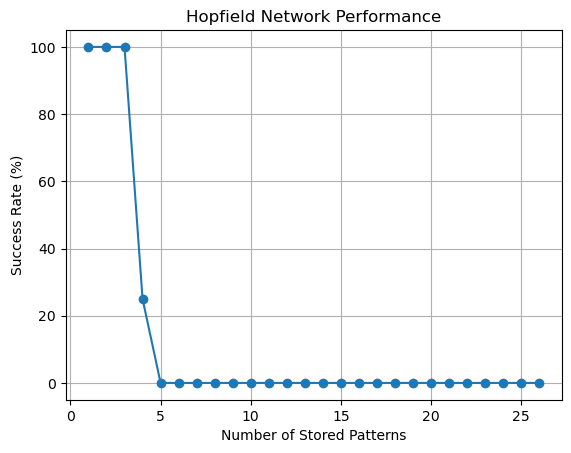

In [108]:
import numpy as np
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt

# Function to generate letter matrix
def generate_letter_matrix(letter, width=10, height=10, font_path="arial.ttf"):
    # Create a blank image with white background
    image = Image.new('L', (width, height), color=255)
    draw = ImageDraw.Draw(image)
    
    # Load the font
    try:
        font = ImageFont.truetype(font_path, size=12)
    except IOError:
        font = ImageFont.load_default()
    
    # Calculate text bounding box and position
    text_bbox = draw.textbbox((0, 0), letter, font=font)
    text_width = text_bbox[2] - text_bbox[0]
    text_height = text_bbox[3] - text_bbox[1]
    x = (width - text_width) // 2
    y = (height - text_height) // 2 - 1  # Adjust as needed
    
    # Draw the letter onto the image
    draw.text((x, y), letter, fill=0, font=font)
    
    # Convert image to numpy array
    array = np.array(image)
    
    # Binarize the image: pixels with value < 128 are set to -1 (black), others to 1 (white)
    binary_array = np.where(array < 128, -1, 1)
    
    return binary_array

# Generate matrices for all letters
letters = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'
letter_matrices = {}

for letter in letters:
    matrix = generate_letter_matrix(letter)
    letter_matrices[letter] = matrix

# Function to visualize a letter matrix
def visualize_letter_matrix(matrix, title):
    plt.figure()
    plt.imshow(matrix.reshape(10, 10), cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

# Function to introduce noise
def introduce_noise(pattern, noise_level=0.2):
    noisy_pattern = pattern.copy()
    num_flips = int(len(pattern) * noise_level)
    flip_indices = np.random.choice(len(pattern), size=num_flips, replace=False)
    noisy_pattern[flip_indices] *= -1
    return noisy_pattern

# Asynchronous update function
def asynchronous_update(state, W, max_iterations=100):
    N = len(state)
    patterns_list = []
    for iteration in range(max_iterations):
        prev_state = state.copy()
        num_changed = 0
        # Randomly shuffle neuron indices
        neuron_indices = np.arange(N)
        np.random.shuffle(neuron_indices)
        for i in neuron_indices:
            net_input = np.dot(W[i], state)
            s_new = 1 if net_input >= 0 else -1
            if s_new != state[i]:
                num_changed += 1
            state[i] = s_new
        patterns_list.append(state.copy())
        if num_changed == 0:
            # print(f"Converged in {iteration+1} iterations")
            break  # Convergence achieved
    return state, patterns_list

# Initialize empty weight matrix
N = len(letter_matrices['A'].flatten())
W = np.zeros((N, N))

# List to keep track of stored letters
stored_letters = []

# Dictionary to keep track of performance
performance = {}

# Loop through each letter
for idx, letter in enumerate(letters):
    print(f"\nAdding letter '{letter}' to the network.")
    
    # Add the letter to the list of stored letters
    stored_letters.append(letter)
    
    # Get the pattern for the current letter
    p = letter_matrices[letter].flatten()
    
    # Update the weight matrix using Hebbian learning rule
    W += np.outer(p, p)
    
    # Ensure no self-connections
    np.fill_diagonal(W, 0)
    
    # Test the network's ability to recall all stored letters
    success_count = 0
    for test_letter in stored_letters:
        # Get the original pattern
        original_pattern = letter_matrices[test_letter].flatten()
        
        # Introduce noise
        initial_state = introduce_noise(original_pattern, noise_level=0.2)
        
        # Run the asynchronous update
        final_state, _ = asynchronous_update(initial_state.copy(), W)
        
        # Check if the network converged to the original pattern
        if np.array_equal(final_state, original_pattern):
            print(f"The network successfully recalled '{test_letter}'.")
            success = True
            success_count += 1
        else:
            print(f"The network failed to recall '{test_letter}'.")
            success = False
        
        # Optionally visualize the recovered pattern
        # visualize_letter_matrix(final_state, f'Recovered {test_letter}')
    
    # Record performance
    performance[len(stored_letters)] = success_count / len(stored_letters)
    
    # Print summary of performance
    print(f"After storing {len(stored_letters)} letters, success rate: {performance[len(stored_letters)]*100:.2f}%")

# Plotting the performance
num_patterns = list(performance.keys())
success_rates = [performance[n]*100 for n in num_patterns]

plt.figure()
plt.plot(num_patterns, success_rates, marker='o')
plt.title('Hopfield Network Performance')
plt.xlabel('Number of Stored Patterns')
plt.ylabel('Success Rate (%)')
plt.grid(True)
plt.show()


**The net can store up to 4 memories** 

### Plotting the stages of learning for 'M'

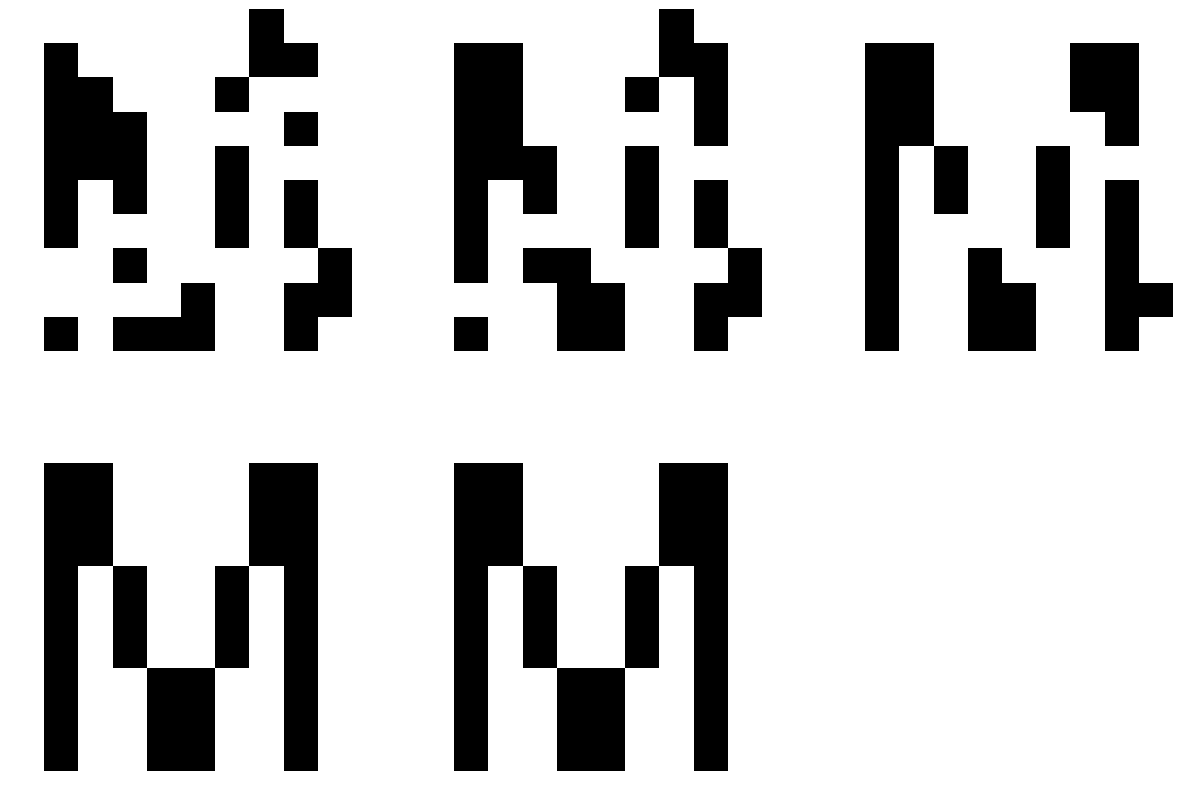

In [103]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten() 
for idx, pattern in enumerate(patterns[::40]):
    ax = axes[idx]
    ax.imshow(np.array(pattern).reshape(10, 10), cmap='gray')
    ax.axis('off')

# Hide any excess axes
for ax in axes[len(patterns[::40]):]:
    ax.axis('off')

plt.show()